# Load pixels from image

In [7]:
%pip install pillow
%pip install numpy
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from PIL import Image
from io import BytesIO

from requests import get as get_http_request
from IPython.display import display

In [9]:
url_to_image: str = '''https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Storegade_182%2C_Esbjerg%2C_3.jpg/640px-Storegade_182%2C_Esbjerg%2C_3.jpg'''
headers = {
    'User-Agent': 'jupyter-script/0.1(https://github.com/KentVejrupMadsen/codespace.jupyter; kent.vejrup.madsen@designermadsen.dk)'
}

http_response = get_http_request(
    url_to_image, 
    headers=headers
)

cursor: tuple = {'r':0, 'g': 0, 'b': 0}
position: tuple = {'x': 0, 'y': 0}

image_pointer = None

In [10]:
def get_image_pointer() -> Image.Image | None:
    global image_pointer
    return image_pointer

def set_image_pointer(pointer: Image.Image) -> None:
    global image_pointer
    image_pointer = pointer


def get_cursor() -> type:
    global cursor
    return cursor

def set_cursor(
    cursor_value: tuple
) -> None:
    global cursor
    cursor = cursor_value

def set_cursor_state(
        r: int, 
        g: int, 
        b: int
) -> None:
    set_cursor({
        'r': r,
        'g': g,
        'b': b
    })

def get_position() -> tuple:
    global position
    return position

def set_position(to_position: tuple) -> None:
    global position
    position = to_position

def set_position_state(x, y):
    set_position(
        {
            'x': x,
            'y': y
        }
    )

def get_x() -> int:
    return get_position()['x']

def get_y() -> int:
    return get_position()['y']


def get_cursor_green() -> int:
    return get_cursor()['g']

def get_cursor_blue() -> int:
    return get_cursor()['b']

def get_cursor_red() -> int:
    return get_cursor()['r']

def get_cursor_as_list() -> list:
    return(
        get_cursor_red(), 
        get_cursor_green(), 
        get_cursor_blue()
    )


In [11]:
grid_dimension: list = (2, 2)

def get_grid() -> list:
    global grid_dimension
    return grid_dimension

def set_grid(value: list) -> None:
    global grid_dimension
    grid_dimension = value

## Sources
https://en.wikipedia.org/wiki/Grayscale

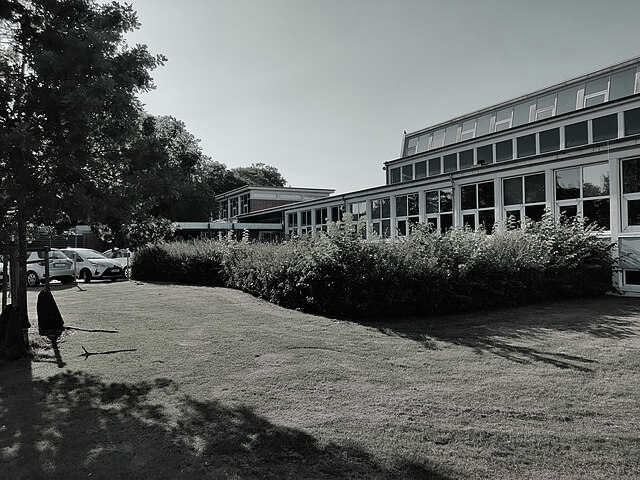

In [12]:
def apply(
    red: int, 
    green: int,
    blue: int
):
    # apply the new state to the selected pixel
    set_cursor_state(
        r=int(red), 
        g=int(green), 
        b=int(blue)
    )    

def grayscale(
    red: int, 
    green: int, 
    blue: int
) -> float:
    result: float = 0.0

    result = result + (red * 0.299)
    result = result + (green * 0.587)
    result = result + (blue * 0.114)

    return result


def work_on():
    # color of the currently selected image
    red, green, blue = get_cursor_red(), get_cursor_green(), get_cursor_blue()

    red = grayscale(
        red, 
        green, 
        blue
    )

    green = grayscale(
        red, 
        green, 
        blue
    )

    blue = grayscale(
        red, 
        green, 
        blue
    )

    apply(
        int(red), 
        int(green), 
        int(blue)
    )


# loads image
def open_image(
        io: BytesIO
) -> None:
    set_cursor_state(0.0, 0.0, 0.0)

    with Image.open(io) as image:
        set_image_pointer(image)
        access_pixels = image.load()
        width, height = image.size

        for index_height in range(height):
            for index_width in range(width):
                r, g, b = access_pixels[
                    index_width, 
                    index_height
                ]
                
                set_position_state(
                    x=index_width, 
                    y=index_height
                )

                set_cursor_state(
                    r, 
                    g, 
                    b
                )
                
                work_on()
                # Sets pixels to a new value
                access_pixels[
                    index_width, 
                    index_height
                ] = get_cursor_as_list()
        
        # Displays the result
        display(image)

open_image(
    io=BytesIO(
        http_response.content
    )
)
